In [5]:
!pip install matplotlib

In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1800)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1800)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
## Generate Random World Cities
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

656


### We will need to do the following PSEUDOCODE

### Import our dependencies and initialize counters and an empty list that will hold the weather data.
### Loop through the cities list.
### Group the cities in sets of 50 to log the process as we find the weather data for each city.
### Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
### Build the city_url or endpoint for each city.
### Log the URL and the record and set numbers.
### Make an API request for each city.
### Parse the JSON weather data for the following:
### City, country, and date
### Latitude and longitude
### Maximum temperature
### Humidity
### Cloudiness
### Wind speed
### Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [31]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# # weather_response = requests.get(query_url)
# weather_json = weather_response.json()

In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | norman wells
Processing Record 6 of Set 1 | zhangjiakou
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | vao
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | tarata
Processing Record 17 of Set 1 | taoudenni
Processing Record 18 of Set 1 | isangel
Processing Record 19 of Set 1 | amderma
City not found. Skipping...
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | daru
Processing Record 22 of Set 1 | ostrovnoy
Processing Record 23 of Se

Processing Record 38 of Set 4 | dehloran
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | lolua
City not found. Skipping...
Processing Record 41 of Set 4 | manhattan
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | pitea
Processing Record 44 of Set 4 | leningradskiy
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | olinda
Processing Record 48 of Set 4 | wufeng
Processing Record 49 of Set 4 | kununurra
Processing Record 50 of Set 4 | meyungs
City not found. Skipping...
Processing Record 1 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 5 | sabha
Processing Record 3 of Set 5 | oranjemund
Processing Record 4 of Set 5 | la ronge
Processing Record 5 of Set 5 | warrington
Processing Record 6 of Set 5 | sobolevo
Processing Record 7 of Set 5 | mount gambier
Processing Record 8 of Set 5 | puerto leguizamo
Processing Re

Processing Record 28 of Set 8 | katobu
Processing Record 29 of Set 8 | saint-philippe
Processing Record 30 of Set 8 | pandan niog
Processing Record 31 of Set 8 | atascadero
Processing Record 32 of Set 8 | koundara
Processing Record 33 of Set 8 | srinagar
Processing Record 34 of Set 8 | tibu
Processing Record 35 of Set 8 | hobyo
Processing Record 36 of Set 8 | amlame
Processing Record 37 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 38 of Set 8 | san luis
Processing Record 39 of Set 8 | wadi musa
Processing Record 40 of Set 8 | samusu
City not found. Skipping...
Processing Record 41 of Set 8 | sanford
Processing Record 42 of Set 8 | nikel
Processing Record 43 of Set 8 | palmas
Processing Record 44 of Set 8 | puerto cabezas
Processing Record 45 of Set 8 | mahibadhoo
Processing Record 46 of Set 8 | gigmoto
Processing Record 47 of Set 8 | bukachacha
Processing Record 48 of Set 8 | arroyo
Processing Record 49 of Set 8 | valparaiso
Processing Record 50 of Set 8 | moerai


Processing Record 12 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 13 of Set 12 | nelidovo
Processing Record 14 of Set 12 | porto walter
Processing Record 15 of Set 12 | marsh harbour
Processing Record 16 of Set 12 | dzilam gonzalez
Processing Record 17 of Set 12 | sumbawanga
Processing Record 18 of Set 12 | aracuai
Processing Record 19 of Set 12 | afanasyevo
City not found. Skipping...
Processing Record 20 of Set 12 | oktyabrskiy
Processing Record 21 of Set 12 | tazovskiy
Processing Record 22 of Set 12 | chapais
Processing Record 23 of Set 12 | qafsah
City not found. Skipping...
Processing Record 24 of Set 12 | bolonchen
City not found. Skipping...
Processing Record 25 of Set 12 | newport
Processing Record 26 of Set 12 | arman
Processing Record 27 of Set 12 | yaan
Processing Record 28 of Set 12 | tres arroyos
Processing Record 29 of Set 12 | burica
City not found. Skipping...
Processing Record 30 of Set 12 | khonuu
City not found. Skipping...
Processing Record 31 of Set 12 |

### Create a DataFrame of City Weather Data. 
#### Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

##### Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries)

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.52,57.52,75.20,69,40,11.41,MU,2020-10-23 16:50:14
1,Ushuaia,-54.80,-68.30,48.20,53,20,18.34,AR,2020-10-23 16:50:14
2,Busselton,-33.65,115.33,55.99,40,0,13.40,AU,2020-10-23 16:50:14
3,Bredasdorp,-34.53,20.04,72.00,79,41,4.00,ZA,2020-10-23 16:50:15
4,Norman Wells,65.28,-126.83,21.20,92,90,4.70,CA,2020-10-23 16:48:35
5,Zhangjiakou,40.81,114.88,40.14,58,0,2.24,CN,2020-10-23 16:50:15
6,New Norfolk,-42.78,147.06,54.00,79,100,1.01,AU,2020-10-23 16:50:15
7,Castro,-24.79,-50.01,76.82,56,49,5.86,BR,2020-10-23 16:50:15
8,Vao,-22.67,167.48,73.54,86,6,17.16,NC,2020-10-23 16:50:16
9,Cape Town,-33.93,18.42,66.99,88,75,11.41,ZA,2020-10-23 16:48:35


### Format the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
#### Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear: new_column_order = ["column2", "column4", "column1"]; Then, we assign a new or the same DataFrame with new column order: 
### df = df[new_column_order]

In [15]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp",'Humidity',"Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2020-10-23 16:50:14,-20.52,57.52,75.20,69,40,11.41
1,Ushuaia,AR,2020-10-23 16:50:14,-54.80,-68.30,48.20,53,20,18.34
2,Busselton,AU,2020-10-23 16:50:14,-33.65,115.33,55.99,40,0,13.40
3,Bredasdorp,ZA,2020-10-23 16:50:15,-34.53,20.04,72.00,79,41,4.00
4,Norman Wells,CA,2020-10-23 16:48:35,65.28,-126.83,21.20,92,90,4.70
5,Zhangjiakou,CN,2020-10-23 16:50:15,40.81,114.88,40.14,58,0,2.24
6,New Norfolk,AU,2020-10-23 16:50:15,-42.78,147.06,54.00,79,100,1.01
7,Castro,BR,2020-10-23 16:50:15,-24.79,-50.01,76.82,56,49,5.86
8,Vao,NC,2020-10-23 16:50:16,-22.67,167.48,73.54,86,6,17.16
9,Cape Town,ZA,2020-10-23 16:48:35,-33.93,18.42,66.99,88,75,11.41


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plot Latitude vs. Temperature
### Recall that to create a scatter plot, we collect then add x- and y-axis data to plt.scatter().

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# # File to Load
# city_data_to_load = "weather_data/city_data.csv"
# # ride_data_to_load = "weather_data/ride_data.csv"

# # Read the City and Ride Data
# city_data_df = pd.read_csv(city_data_to_load)
# # ride_data_df = pd.read_csv(ride_data_to_load)

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/23/20'

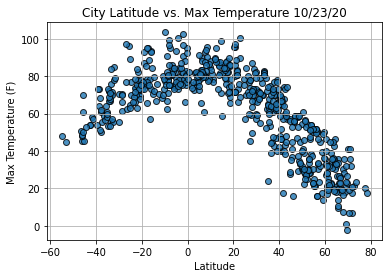

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

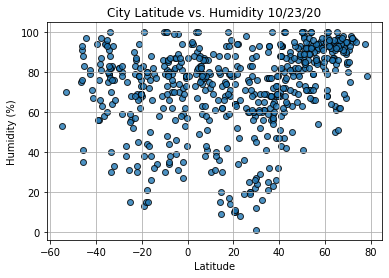

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

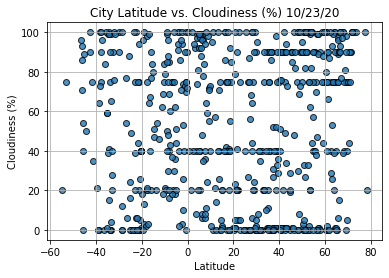

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

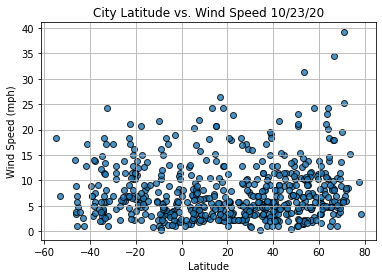

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

## Use Linear Regression to Find the Relationship Between Variables


In [25]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2020-10-23 16:50:16
Lat                        -46.19
Lng                        168.86
Max Temp                    45.36
Humidity                       91
Cloudiness                     86
Wind Speed                   3.33
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
590     True
591    False
592     True
593    False
594     True
Name: Lat, Length: 595, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2020-10-23 16:50:14,-20.52,57.52,75.20,69,40,11.41
1,Ushuaia,AR,2020-10-23 16:50:14,-54.80,-68.30,48.20,53,20,18.34
2,Busselton,AU,2020-10-23 16:50:14,-33.65,115.33,55.99,40,0,13.40
3,Bredasdorp,ZA,2020-10-23 16:50:15,-34.53,20.04,72.00,79,41,4.00
4,Norman Wells,CA,2020-10-23 16:48:35,65.28,-126.83,21.20,92,90,4.70


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Northern Hemisphere \n
                    for Maximum Temperature', 'Max Temp',(10,40))

SyntaxError: EOL while scanning string literal (<ipython-input-29-7e7639d0ce84>, line 6)

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Find the Correlation Between Latitude and Percent Humidity

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

## Find the Correlation Between Latitude and Percent Cloudiness

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n
                   for % Cloudiness', '% Cloudiness',(10,55))

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

## Find the Correlation Between Latitude and Wind Speed

In [ ]:
## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

## Create Heatmaps for Weather Parameters